Data: https://zh.wikipedia.org/wiki/%E6%96%B0%E5%9E%8B%E5%86%A0%E7%8B%80%E7%97%85%E6%AF%92%E8%82%BA%E7%82%8E%E5%85%A8%E7%90%83%E7%96%AB%E6%83%85%E7%97%85%E4%BE%8B

Also here:
https://news.sina.cn/zt_d/yiqing0121

In [1]:
# daily increase
c = [
    0,
    1,
    4, 
    18,
    59,
    78, 
    93, 
    151, 
    134, 
    265, 
    460, 
    699, 
    783, 
    1780,
    1478,
    1750,
    2010,
    2125,
    2524,
    2826,
    3233,
    3892,
    3697,
    3151,
    3387,
    2653,
    2984,
    2473,
    2034,
    15140, # without change 13332
    4040,
    2644,
    2018,
    2051,
    1893,
    1751,
    396, # WTH?
    1717,
    649,
    221,
    487,
    441,
    440,
    329
]

In [2]:
tmr_date = "2_27_2020"

# Standard Imports

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats

78959


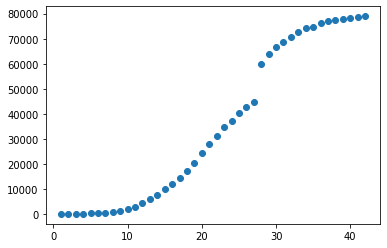

In [4]:
total = [c[0]]
for i in c[1:]:
    total.append(total[-1] + i)
# clean up the first few data points
total = total[2:]
print(total[-1])
plt.clf()
plt.scatter(np.arange(1, len(total) + 1), total)
plt.show()

In [5]:
# Define confidence interval.
ci = 0.95
# Convert to percentile point of the normal distribution.
# See: https://en.wikipedia.org/wiki/Standard_score
pp = (1. + ci) / 2.
# Convert to number of standard deviations.
nstd = stats.norm.ppf(pp)
print(nstd)

1.959963984540054


In [6]:
def r_squared(x_data, y_data, func, popt):
    """Compute R squared given the input data and func."""
    residuals = y_data - func(x_data, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_data-np.mean(y_data))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# Growth total

[   1.08247618 -104.71080913]


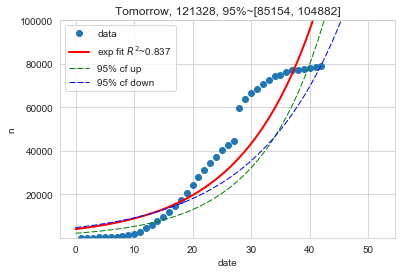

In [7]:
sns.set_style("whitegrid")
def exp(x, a, c):
    y = a ** (x - c)
    return y
    
xdata = np.arange(1, len(total)+1)
ydata = np.array(total)
# initial guess for curve fit coefficients
guess = [20, 1, 50000, 0]

popt, pcov = curve_fit(exp, xdata, ydata, sigma=np.sqrt(xdata))
print(popt)
# Standard deviation errors on the parameters.
perr = np.sqrt(np.diag(pcov))
popt_up = popt + nstd * perr
popt_down = popt - nstd * perr
# print(popt_up, popt_down)
R2 = r_squared(xdata, ydata, exp, popt)

x = np.linspace(0, len(xdata) + 10, 50)
y = exp(x, *popt)
tmr = len(xdata) + 1
pred = int(exp(tmr, *popt))
pred_up = int(exp(tmr, *popt_up))
pred_down = int(exp(tmr, *popt_down))

plt.plot(xdata, ydata, 'o', markersize=6., label='data')
plt.plot(x, y, label=r'exp fit $R^2$~{}'.format(round(R2, 3)), c='r', lw=2.)
plt.plot(x, exp(x, *popt_up), c='g', dashes=[6, 2], lw=1., label='95% cf up')
plt.plot(x, exp(x, *popt_down), c='b', dashes=[6, 2], lw=1., label='95% cf down')
plt.xlabel('date')
plt.ylabel('n')
plt.ylim(1, 1E5)
# plt.yscale('log')
plt.legend(loc='best')
plt.title("Tomorrow, {}, 95%~[{}, {}]".format(pred, pred_down, pred_up))
# plt.savefig('Plots/{}.png'.format(tmr_date), dpi=300)
plt.show()
plt.show()

# Growth rate was also exp

In [8]:
# starting_index = 1
# x_data = np.arange(1, len(c[starting_index:])+1)
# y_data = np.array(c[starting_index:])
# # initial guess for curve fit coefficients
# def power(x, a, b, c, d):
#     return a * (x ** b) + c * x + d

# popt, pcov = curve_fit(power, x_data, y_data, sigma=np.sqrt(y_data))
# print(popt)
# print(r_squared(x_data, y_data, power, popt))
# x = np.linspace(0, 30, 150)
# y = power(x, *popt)

# tmr = len(xdata) + 1
# print(int(power(tmr, *popt)), int(power(tmr + 1, *popt)), int(power(tmr + 2, *popt)))

# plt.plot(x_data, y_data, 'o', label='data')
# plt.plot(x, y, label='fit')
# plt.ylim(10, 1E4)
# plt.yscale('log')
# plt.legend(loc='best')
# plt.show()

# Total can converge now

In [9]:
from datetime import date, timedelta

[1.25559566e+00 8.13118586e+04 1.20001488e+00 2.81429447e+01]
80167 80397 80582


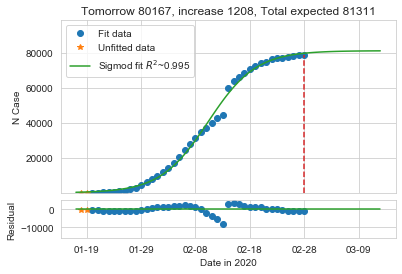

In [10]:
def sigmoid(x, a, n, b, c):
    y = n * 1 / (1  +  b * n * a ** (-c - x))
    return y

def prediction(my_func, name="sigmoid"):
    # initial guess for curve fit coefficients
    starting_index = 2
    x_prev_data = np.arange(-starting_index + 1, 1)
    y_prev_data = np.array(total[:starting_index])
    xdata = np.arange(1, len(total[starting_index:])+1)
    ydata = np.array(total[starting_index:])
    
    guess = [1.3, 100000, 2.2, 10]
    popt, pcov = curve_fit(my_func, xdata, ydata, p0=guess, sigma=np.sqrt(xdata), bounds=([0, 7E4, 0, 0], [30, 2E6, 50, 50]))
    print(popt)
    R2 = r_squared(xdata, ydata, my_func, popt)

    perr = np.sqrt(np.diag(pcov))
    popt_up = popt + nstd * perr
    popt_down = popt - nstd * perr
    
    forward_steps = 14
    x = np.linspace(-starting_index, len(total) - starting_index + forward_steps, 100)
    y = my_func(x, *popt)

    tmr = len(xdata) + 1
    pred = int(my_func(tmr, *popt))
    pred_up = int(my_func(tmr, *popt_up))
    # pred_down = int(my_func(tmr, *popt_down))
    # print(pred_up, pred_down)
    print(pred, int(my_func(tmr + 1, *popt)), int(my_func(tmr + 2, *popt)))
    
    fig = plt.figure(constrained_layout=False)
    gs = fig.add_gridspec(nrows=5, ncols=4)
    ax1 = fig.add_subplot(gs[0:-1, :])
    ax2 = fig.add_subplot(gs[-1, :])
   
    total_expected = int(popt[1])
    ax1.plot(xdata, ydata, 'o', label='Fit data')
    ax1.plot(x_prev_data, y_prev_data, '*', label='Unfitted data')
    ax1.plot(x, y, label=r'Sigmod fit $R^2$~{}'.format(round(R2, 3)))
    ax1.plot([len(total) - starting_index, len(total) - starting_index], [0, ydata[-1]], '--')
    ax1.set_title("Tomorrow {}, increase {}, Total expected {}".format(pred, pred - total[-1], total_expected))
    ax1.set_ylim(1, total[-1] * 1.25)
    ax1.legend(loc='best')
    # ax1.set_xticks([])
    # ax1.set_xlabel('Date')
    ax1.set_ylabel('N Case')
    
    residuals = ydata - my_func(xdata, *popt)
    prev_residuals = y_prev_data - my_func(x_prev_data, *popt)
    ax2.plot(xdata, residuals, 'o', label='residuals')
    ax2.plot(x_prev_data, prev_residuals, '*', label='prev residuals')
    ax2.plot(x, np.zeros(len(x)))
    ax2.set_ylim(min(residuals) * 2, 5000)
    ax2.set_xlabel('Date in 2020')
    ax2.set_ylabel('Residual')
    x_ticks = ax2.get_xticks()
    # print(x_ticks)
    current_day = len(total) - starting_index
    # correct time difference
    current_date = date.today() + timedelta(days=1)
    date_ticks = []
    for x_tick in x_ticks:
        date_ticks.append(current_date + timedelta(days=x_tick - current_day))
    date_ticks = [i.strftime('%m-%d') for i in date_ticks]
    # print(date_ticks)
    ax2.set_xticklabels(date_ticks)
    plt.savefig('Plots/{}_{}.png'.format(tmr_date, name), dpi=300)
    plt.show()
    
prediction(sigmoid, "sigmoid")